# Assignment 1 : Haberman Dataset EDA

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Load csv into a pandas dataFrame.
haberman = pd.read_csv("haberman.csv")

In [7]:
#or how many data points and features
(print(haberman.shape))

(306, 4)


### We have a dataset of 306 rows and 4 columns.
Let us have a visual of some data in the table

In [8]:
#First 5 data points
#Last 5 data points
print(haberman.head())
print(haberman.tail())

   age  year  nodes status
0   30    64      1    Yes
1   30    62      3    Yes
2   30    65      0    Yes
3   31    59      2    Yes
4   31    65      4    Yes
     age  year  nodes status
301   75    62      1    Yes
302   76    67      0    Yes
303   77    65      3    Yes
304   78    65      1     No
305   83    58      2     No


In [9]:
# Data points with respect to status='Yes' and 'No'' 
haberman["status"].value_counts()

Yes    225
No      81
Name: status, dtype: int64

### analysis(1)
Here, data points with a positive survival chance is approximately 3 times greater than 
no survival chance, so it is an imbalanced dataset.

# Mean and Median

In [10]:

#Mean, median, std with respect to survival chances
haberman_df=haberman.groupby('status')
print("-------Mean------")

print(haberman_df.mean())

print("-------Median------")

print(haberman_df.median())

print("-------Std------")

print(haberman_df.std())

print("-------Min & Max nodes ------")

print(haberman_df['nodes'].max())
print(haberman_df['nodes'].min())

-------Mean------
              age       year     nodes
status                                
No      53.679012  62.827160  7.456790
Yes     52.017778  62.862222  2.791111
-------Median------
        age  year  nodes
status                  
No       53    63      4
Yes      52    63      0
-------Std------
              age      year     nodes
status                               
No      10.167137  3.342118  9.185654
Yes     11.012154  3.222915  5.870318
-------Min & Max nodes ------
status
No     52
Yes    46
Name: nodes, dtype: int64
status
No     0
Yes    0
Name: nodes, dtype: int64


### analyis(2)
i) mean,median and standard deviation of features age and  year is almost same for both the class.

ii) mean,median and standard deviation of feature nodes is different for both the class .

iii) As we have imbalanced data set our mean for class level "NO" is 7.5..and Standard dev. is 9.18..so with a balanced data set , mean would have increased to higher value so it could be atleast 1 std dev away from mean of class level "Yes".


# Bi-Variate Plots

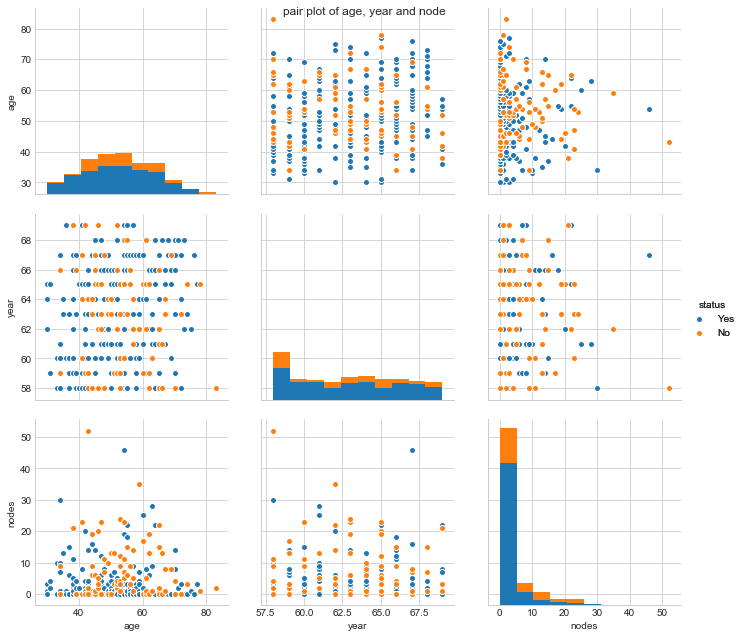

In [12]:
sns.set_style('whitegrid')

sns.pairplot(haberman,hue="status",size=3).add_legend()
plt.suptitle("pair plot of age, year and node")
plt.show()

### analysis(3)
Canot classify based on any of the pair plots as data points for both the class are not linearly separable.

# Uni-Variate Plots

## Histogram and PDF

C:\Users\91889\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\91889\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


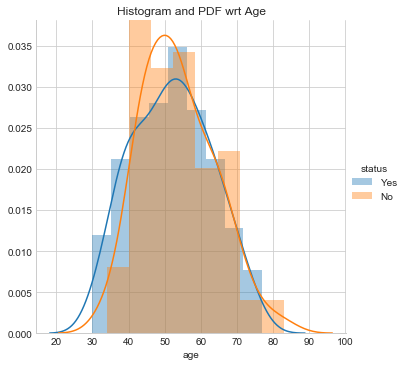

In [13]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title("Histogram and PDF wrt Age")
plt.show();

### analysis(4)

Histogram and PDf plot with respect to age: for both Class level(surival/status)='yes' and 'No', plots are almost over lapped, so we cannot quantify the data and categorize them into separate data intervals. 


C:\Users\91889\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\91889\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


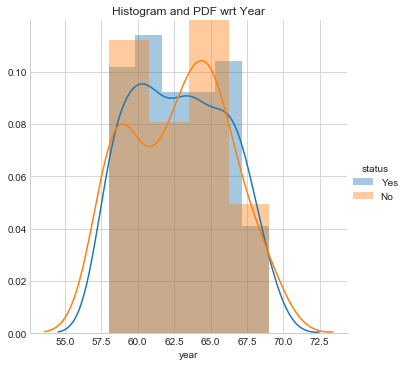

In [14]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title("Histogram and PDF wrt Year")
plt.show();

### analysis(5)
Histogram and PDf plot with respect to feature 'year':We cannot get any segregation as the data is widely overlapped.

However, we can say that from year 58 to 63; the status 'Yes'>'No'. Thus survival rate was higher in this time period.

C:\Users\91889\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\91889\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


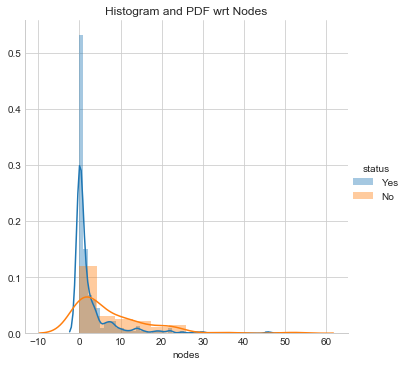

In [16]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();

plt.title("Histogram and PDF wrt Nodes")
plt.show();

### analysis(6) 
i) Histogram and PDF plot with respect to nodes:For Class level(surival/status)='Yes', we have more no of nodes
  in the range of[0,5] as a sharp cuve is seen in this range.
  
ii) PDF of Class level 'No' for feature 'nodes' has a more wide range, with value ranging from 0 to 60.

iii) As both plots are overlapped and most of nodes for class level 'Yes' or 'No' are in the range of [0,10],
we are unable to classify patient's survival vchances on the basis of nodes.

iv) However, wrt to all the features; we can take 'nodes' is a more appropriate parmeter to classify the data. So, we would be taking nodes as the parameter in our Univariate plots.


# CDF Plot


[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


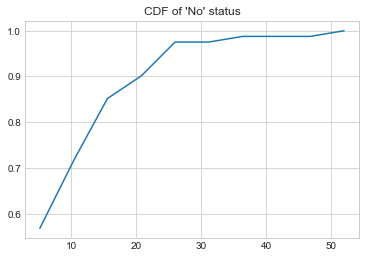

In [22]:
#Plot CDF of haberman_No
haberman_No = haberman.loc[haberman["status"] == "No"];
haberman_Yes = haberman.loc[haberman["status"] == "Yes"];

counts, bin_edges = np.histogram(haberman_No['nodes'], bins=10, 
                                 density = True, )
pdf = counts/(sum(counts))

print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf)

plt.title("CDF of 'No' status")

plt.show();

[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


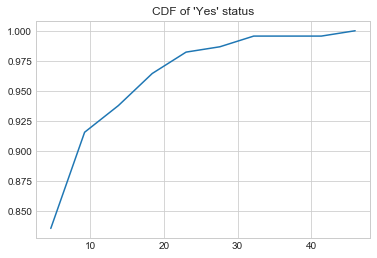

In [23]:
#Plot CDF of haberman_Yes


counts, bin_edges = np.histogram(haberman_Yes['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf)


plt.title("CDF of 'Yes' status")

plt.show();

### analysis(7)
By looking at the CDF plots for both 'No' and 'Yes' status; we can say that the 90th percentile is at 20 and 8 respectively. However, 100th percentile for both class is almost same. Thus, patients with less node count has higher chance of survival(status = Yes).


# Box-Plot

Text(0.5,1,"Box plot for status 'Yes' and 'NO'")

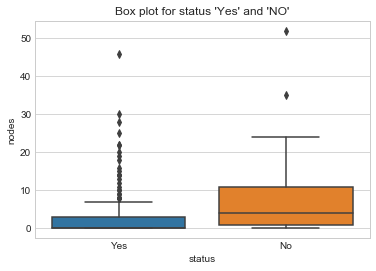

In [24]:
sns.boxplot(x='status',y='nodes',data=haberman)
plt.title("Box plot for status 'Yes' and 'NO'")

### analysis(7):
i) There is more outlier for class level 'No' as compared to class level 'Yes'.

ii) For class level 'Yes', Q1 and Q2 seems same.(Because of imbalanced data).

iii) For class level 'No', more no of data points(nodes) in Q2-Q3 compared to Q1-Q2, thus the 50th to 75th percentile is gretaer than the 25th to 50th percentile.

iv) But somehow, we can say that if number of nodes for the patient is between 0-10(as 75% points(nodes) lies in this range) , 
    it can be labelled as Yes;i.e, there is positive survival chance.
    
    
# Violin-Plot

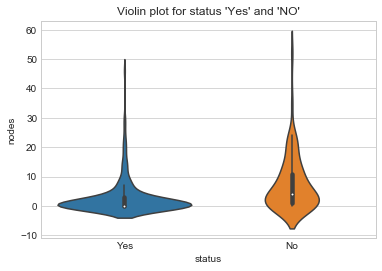

In [25]:
sns.violinplot(x="status", y="nodes", data=haberman, size=10)
plt.title("Violin plot for status 'Yes' and 'NO'")
plt.show()

### analysis(8)
i) Class 'Yes' contains a saturated node value from [0,10].The upper whisker is longer than the lower one.

ii) Class 'No' has node count as more varied.



# Density/ Contour Plot


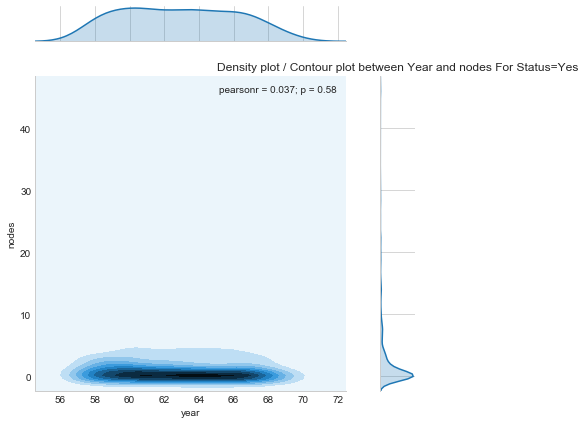

In [30]:

sns.jointplot(x="year", y="nodes", data=haberman_Yes, kind="kde",space=1);
plt.title("Density plot / Contour plot between Year and nodes For Status=Yes")
plt.show();


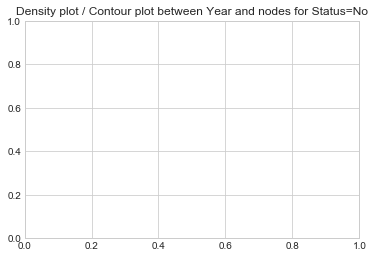

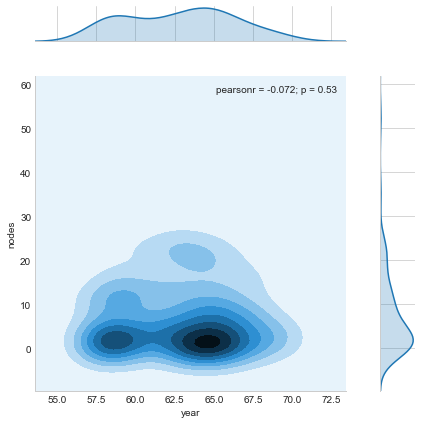

In [32]:
plt.title("Density plot / Contour plot between Year and nodes for Status=No")
sns.jointplot(x="year", y="nodes", data=haberman_No, kind="kde",space=1);

plt.show();


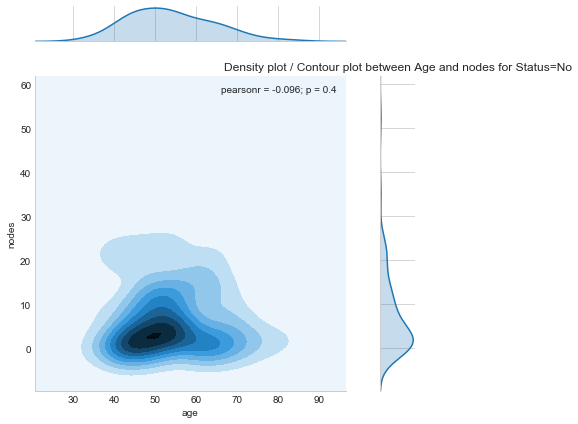

In [34]:
sns.jointplot(x="age", y="nodes", data=haberman_No, kind="kde",space=1);
plt.title("Density plot / Contour plot between Age and nodes for Status=No")
plt.show();


### analysis(9)
i) the contour plot for 'Yes' class is extremely overlapped between the layers,thus there is very less variation of node counts.

ii) the nodes count should be less than 10 for a high survival chance(status = Yes).

iii) For class 'No', the nodes count has a more varied data with a clear layering for node-age plot. However, for node-year plot, there is an ambiguous layering and does not provide a clear segregation.

# Conclusion:

1. The  dataset is imbalanced as data points with a positive survival chance is approximately 3 times greater than negative survival chance.
2. From pair plot we can see class level(Yes--positive survival chance and no---negative survival chance) are not linearly separable.
3. Somehow from Histogram,PDF, CDF plot And Boxplot feature 'Nodes' is giving some intution in the dataset, but still we can not classify them  using if-else.
4. The classification of data wrt 'Nodes' shows us that patients with less nodes count has higher chance of survival(status = Yes).
5. Thus, in this imbalanced dataset, we can take 'Nodes' as a parameter to get some segregation of data.

